<a href="https://colab.research.google.com/github/Daimond92/python_data_science/blob/develop/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASE 1**

## Importaciones

In [51]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import prediction_error, residuals_plot
import pickle

In [ ]:
print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


## Cargar datos

In [2]:
archivo = 'https://raw.githubusercontent.com/Daimond92/python_data_science/refs/heads/develop/Data/flights.csv'

In [3]:
datos = pd.read_csv(archivo)

## Analisis exploratorio

In [ ]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [ ]:
datos.shape

(71175, 11)

In [ ]:
round(.88*60)

53

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [ ]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


### Analisis gráfico

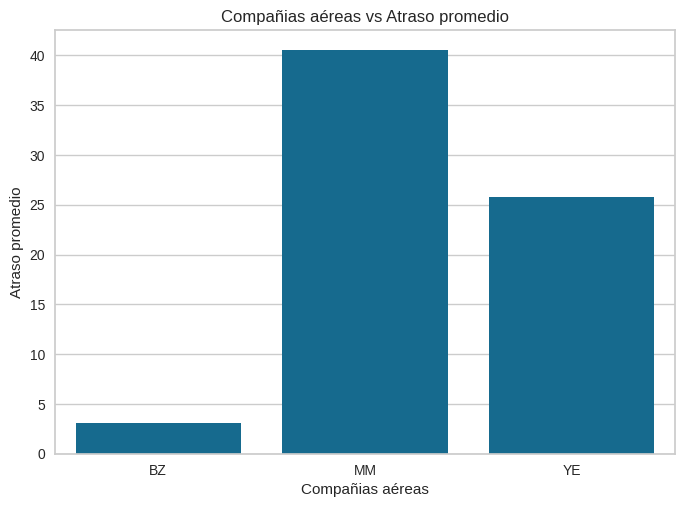

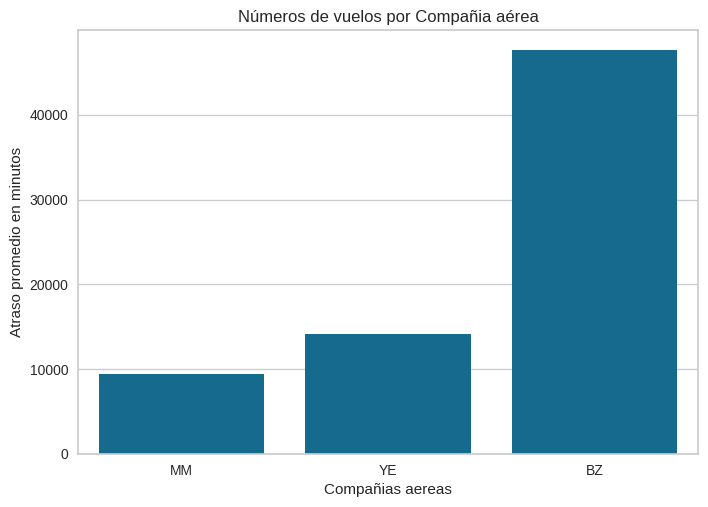

In [ ]:
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias aéreas vs Atraso promedio')
plt.xlabel('Compañias aéreas')
plt.ylabel('Atraso promedio')
plt.show()

sns.countplot(x='airline', data=datos)
plt.title('Números de vuelos por Compañia aérea')
plt.xlabel('Compañias aereas')
plt.ylabel('Atraso promedio en minutos')
plt.show()

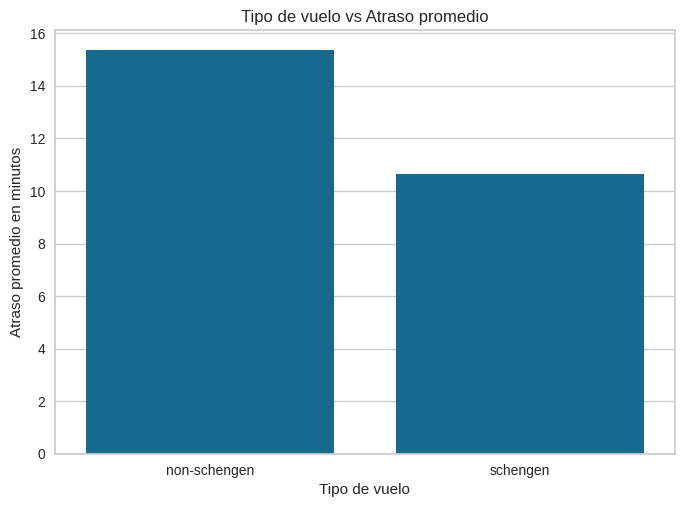

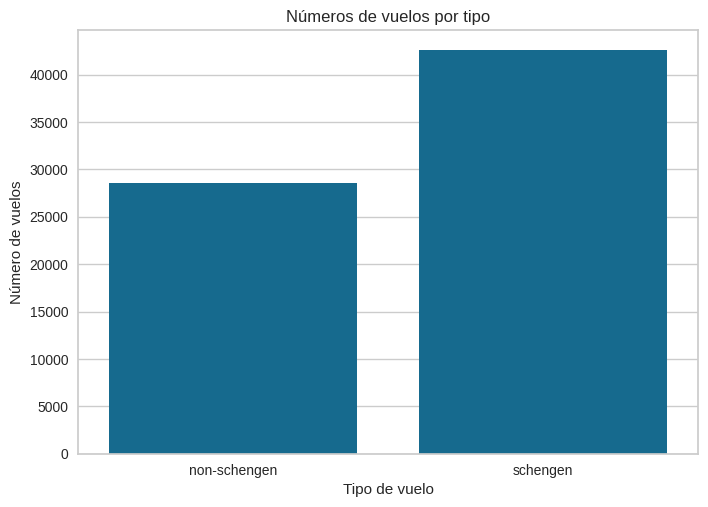

In [ ]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs Atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(x='schengen', data=datos)
plt.title('Números de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

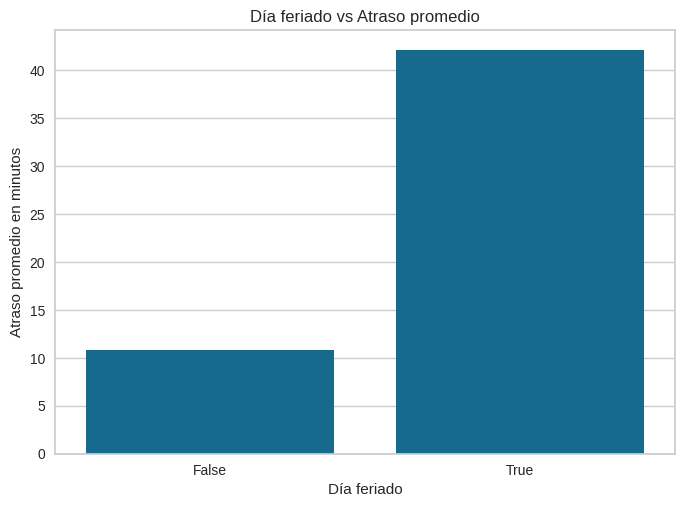

In [ ]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Día feriado vs Atraso promedio')
plt.xlabel('Día feriado')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [ ]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [ ]:
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


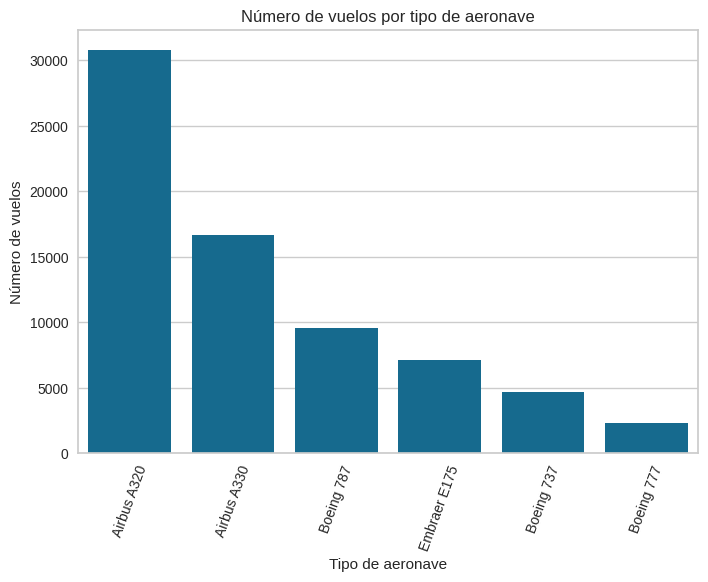

In [ ]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

### Distribución de datos

<Axes: xlabel='arrival_time', ylabel='Count'>

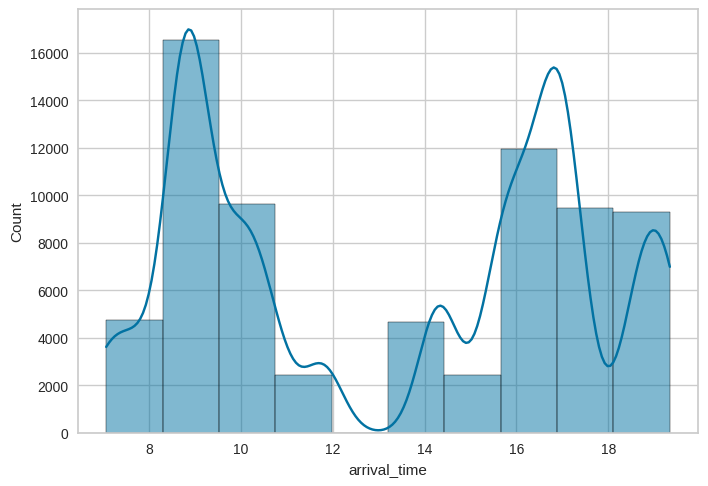

In [ ]:
sns.histplot(data=datos, x='arrival_time', kde=True, bins=10)

In [ ]:
def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna], [75, 25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

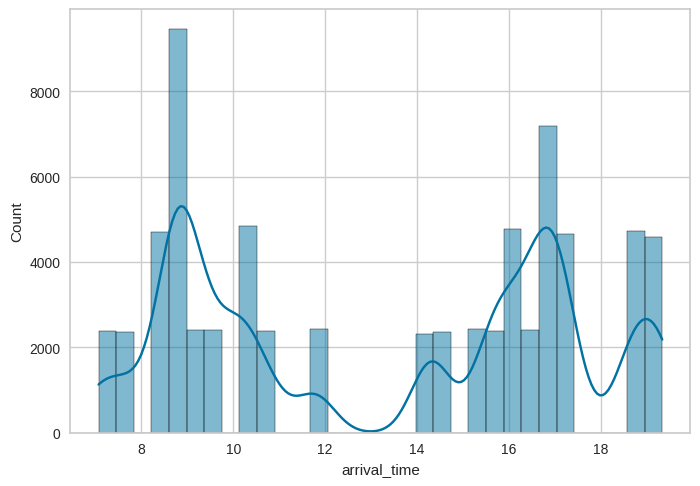

In [ ]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

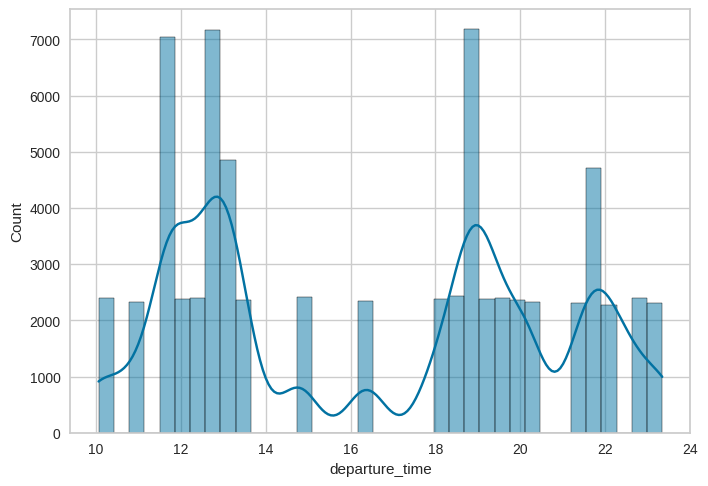

In [ ]:
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth)

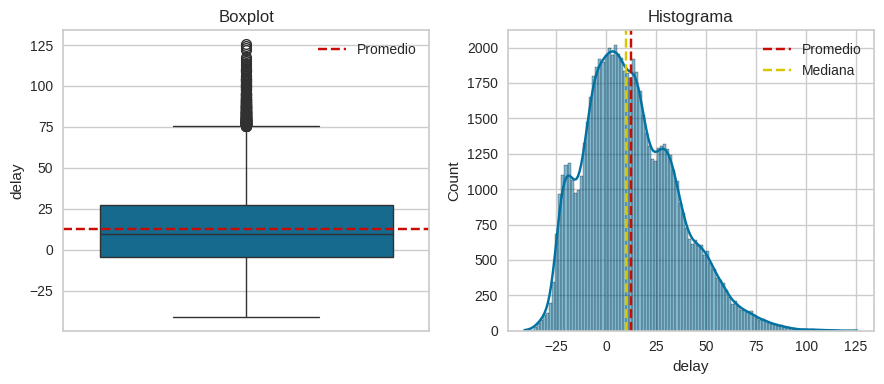

In [ ]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', kde=True, binwidth=binwidth, ax=ax[1])
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

#**CLASE 2**

## Creando columnas

In [ ]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [4]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [5]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5, 6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
36353,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,233,2016,False,-21.105404,2016-08-21,True,Sunday
32744,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,357,2015,False,37.170737,2015-12-24,False,Thursday
11782,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,55,2012,False,74.063367,2012-02-25,True,Saturday
29694,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,154,2015,False,10.920154,2015-06-04,False,Thursday
37201,12,YE,Airbus A330,schengen,TZF,17.313731,21.313731,290,2016,False,9.128465,2016-10-17,False,Monday


## Feature encoding

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [6]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
52379,13,BZ,Boeing 787,0,TCY,10.172731,13.172731,206,2019,0,-13.325107,2019-07-26,0,Friday
39740,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,94,2017,0,-34.754069,2017-04-05,0,Wednesday
65023,22,YE,Airbus A320,0,MWL,8.794147,11.794147,319,2021,0,17.121085,2021-11-16,0,Tuesday
12981,26,MM,Airbus A320,0,TCY,8.885071,10.885071,135,2012,0,27.671030,2012-05-15,0,Tuesday
19006,29,BZ,Boeing 737,1,ZQO,8.591208,11.591208,172,2013,0,8.894470,2013-06-22,1,Saturday


### Códificación por get_dummies

In [7]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
25929,10,0,8.939996,11.939996,268,2014,0,49.461977,2014-09-26,0,...,1,0,0,1,0,0,0,0,0,0
62111,27,1,14.376052,16.376052,125,2021,0,17.852822,2021-05-06,0,...,0,0,0,0,0,0,0,1,0,0
57876,20,1,16.909690,18.909690,208,2020,0,14.049107,2020-07-27,0,...,0,0,0,0,1,0,0,0,0,0
55333,26,0,8.885071,10.885071,38,2020,0,24.935569,2020-02-08,1,...,1,0,0,0,0,1,0,0,0,0
16204,7,1,8.564949,13.564949,350,2012,0,42.276478,2012-12-16,1,...,0,1,0,0,0,0,1,0,0,0


### Codificación por OneHotEncoder

In [ ]:
categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos_codificados_2 = one_hot_enc.fit_transform(datos)
df2 = pd.DataFrame(datos_codificados_2, columns=one_hot_enc.get_feature_names_out())
df2.sample(5)

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
63511,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22,0,8.794147,11.794147,219,2021,0,2.057072,2021-08-08,1
27687,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,1,15.729617,18.729617,20,2015,0,13.787543,2015-01-21,0
28440,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9,0,10.733469,12.733469,71,2015,0,-17.760088,2015-03-13,0
25349,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22,0,8.794147,11.794147,229,2014,0,15.209422,2014-08-18,0
53950,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19,1,16.24522,19.24522,311,2019,0,30.93242,2019-11-08,0


## Limpiando datos

In [ ]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [ ]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [10]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time','year', 'day', 'date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
34511,1,14.376052,0,-7.141310,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
38710,1,17.313731,0,13.575949,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
19610,0,16.571894,0,2.268578,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
68754,1,8.591208,0,27.443675,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
63341,1,18.635384,0,-26.181756,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
39905,1,18.635384,0,13.691924,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
64155,1,7.708301,0,-19.622427,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
62329,0,8.794147,0,39.037330,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
19869,0,15.496519,0,14.263905,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
55727,0,10.733469,0,-21.203611,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


#**CLASE 3**

## Definir baseline

https://scikit-learn.org/stable/

In [11]:
X = df.drop(['delay'], axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)

DummyRegressor()

In [21]:
y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  metricas = {
      'Raíz del Error Cuadrático Medio (RMSE)':round(rmse ** (1/2), 4),
      'Error Absoluto Medio (MAE)':round(mae, 4),
      'R2 Score':round(r2, 4)
      }
  return metricas

In [22]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'Raíz del Error Cuadrático Medio (RMSE)': 23.1612,
 'Error Absoluto Medio (MAE)': 18.5646,
 'R2 Score': -0.0}

### Otra forma de calcular las métricas

In [23]:
estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
Raíz del Error Cuadrático Medio (RMSE): 23.1612
Error Absoluto Medio (MAE): 18.5646
R2 Score: -0.0


Estrategia: median
Raíz del Error Cuadrático Medio (RMSE): 23.3446
Error Absoluto Medio (MAE): 18.4452
R2 Score: -0.0159


Estrategia: quantile
Raíz del Error Cuadrático Medio (RMSE): 28.7554
Error Absoluto Medio (MAE): 22.0248
R2 Score: -0.5414


Estrategia: constant
Raíz del Error Cuadrático Medio (RMSE): 23.3079
Error Absoluto Medio (MAE): 18.4449
R2 Score: -0.0127




## Bloques aleatorios

[Yellowbrick](https://www.scikit-yb.org/en/latest/)

In [25]:
modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf

{'Raíz del Error Cuadrático Medio (RMSE)': 13.7479,
 'Error Absoluto Medio (MAE)': 11.0262,
 'R2 Score': 0.6477}

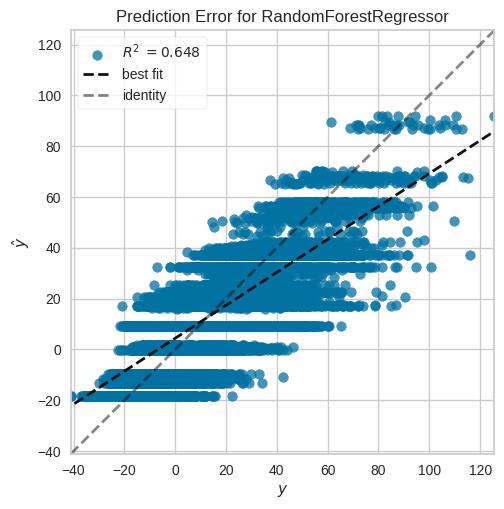

In [27]:
visuallizar = prediction_error(modelo, X_train, y_train, X_test, y_test);

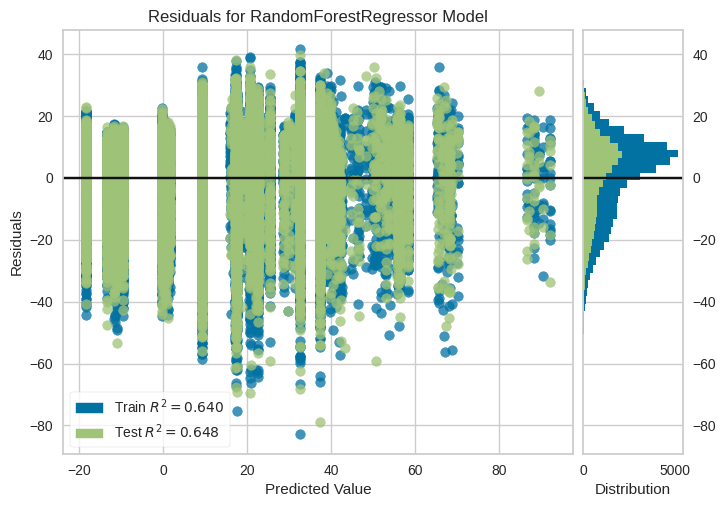

In [29]:
residuos = residuals_plot(modelo, X_train, y_train, X_test, y_test);

## Validación cruzada

In [32]:
from ctypes import c_void_p
scoring = {
    'Raíz del Error Cuadrático Medio (RMSE)': 'neg_root_mean_squared_error',
    'Error Absoluto Medio (MAE)': 'neg_mean_absolute_error',
    'R2 Score': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(modelo, X_train, y_train, cv=cv, scoring=scoring)
cv_resultados

{'fit_time': array([3.1924355 , 4.21559191, 4.54641628, 3.25608134, 2.9484334 ]),
 'score_time': array([0.05952859, 0.10751557, 0.06386185, 0.05995059, 0.05779719]),
 'test_Raíz del Error Cuadrático Medio (RMSE)': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_Error Absoluto Medio (MAE)': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2 Score': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

#**CLASE 4**

## Feature importances

In [33]:
df.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [34]:
len(df.columns)

31

In [36]:
importances = modelo.feature_importances_

In [37]:
feature_importances = pd.DataFrame({
    'Features': X.columns,
    'Importances': (importances * 100).round(2)
}).sort_values('Importances', ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [38]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred_selected = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_pred_selected)
  resultados[f'{i} features'] = list(metricas.values())

resultados

,1 features,5 features,10 features,15 features,20 features,25 features,30 features
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [41]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred_selected = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_pred_selected)
  resultados[f'{i} features'] = list(metricas.values())

resultados

,10 features,11 features,12 features,13 features,14 features,15 features
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [42]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X_train[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
71063,1,0,0,1,0,11.781391,0,1,0,0,0,0,0
330,0,0,0,0,1,18.801235,0,1,0,0,0,0,0
59411,1,0,1,0,0,9.668655,0,0,0,0,0,1,0
34106,1,0,0,1,0,10.733469,0,0,0,0,1,0,0
150,0,0,1,0,0,8.794147,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1,0,0,1,0,11.781391,0,1,0,0,0,0,0
6265,0,0,0,0,0,17.033688,1,0,0,0,0,0,0
54886,1,0,0,1,0,16.718722,0,0,0,0,0,1,0
860,0,0,0,1,0,17.313731,0,0,0,0,1,0,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y_train, random_state=42)

## Hiperparametros con GridSearchCV

In [44]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300],
}

In [47]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid = param_grid,
                           cv=cv,
                           scoring='r2')

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [48]:
model_grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [49]:
y_pred_grid = model_grid.predict(X_test)
resultados_grid = calcular_regresion(y_test, y_pred_grid)
resultados_grid

{'Raíz del Error Cuadrático Medio (RMSE)': 13.3251,
 'Error Absoluto Medio (MAE)': 10.6903,
 'R2 Score': 0.6702}

In [50]:
resultados['modelo_grid'] = list(resultados_grid.values())
resultados

,10 features,11 features,12 features,13 features,14 features,15 features,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.3251
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6903
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6702


## Serializar el modelo

In [53]:
try:
  with open('champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)

  print('Modelo serializado con exito.')
except Exception as e:
  print(f'Error al serializar el modelo: {e}')

Modelo serializado con exito.


## Probando el modelo

Donde los valores corresponden a:
```Python

schengen: 0
arrival_time: 10.8941
is_holiday: 0
is_weekend: 0
airline_BZ: 0
airline_MM: 0
airline_YE: 1
aircraft_type_Airbus A320: 1
aircraft_type_Airbus A330: 0
aircraft_type_Boeing 737: 0
aircraft_type_Boeing 777: 0
aircraft_type_Boeing 787: 0
aircraft_type_Embraer E175: 0

```

In [54]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [55]:
file_path = '/content/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


In [56]:
# Ejemplo de predicción con datos de entrada 'X'
model.predict([nueva_muestra])[0]

np.float64(49.94313387214342)